# Heart Disease Prediction 

## In this project we want to predict if a human may suffer a heart disease in ten years based on thousand of pacients and several attributes
### 1) Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

### 2) Load de data and study the quality

Columns:  4238 
 Rows:  16


Column names: ['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose

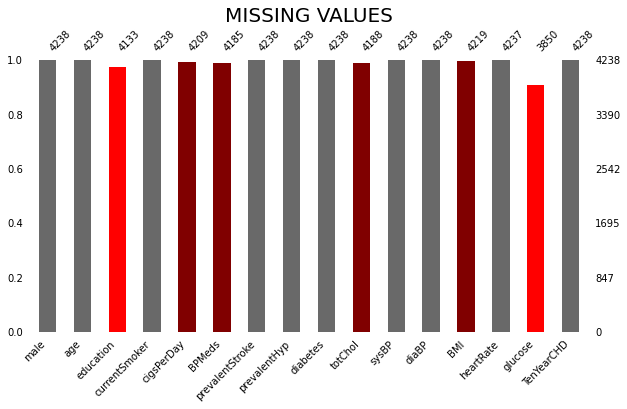

In [2]:
data = pd.read_csv('heart.csv')

print('Columns: ',data.shape[0],'\n','Rows: ',data.shape[1])
print('\n')
print('Column names:', data.columns.values)
print('\n')
print(data.dtypes)



print('\n')

#plot the missing data to visualize more easily 
print(data.isna().sum())
color= ['dimgrey','dimgrey','red','dimgrey','maroon','maroon','dimgrey','dimgrey','dimgrey','maroon','dimgrey','dimgrey','maroon','dimgrey','red','dimgrey']
msno.bar(data,fontsize=10,color=color,figsize=(10,5))
plt.title('MISSING VALUES',fontsize=20)
plt.show()

As we can see this dataset has 4238 rows and 16 columns. All the columns types are correct because we're only working with numbers in all of them.

The education, cigs per day, BPMeds, totChol, BMI, heartRate and glucose columns have missing values. In the next step we're going to fix this problem by removing the education because isn't relevant and replacing the NaN's with the mean of each column 



In [3]:
#Drop education
data.drop(columns=['education'],inplace=True)

#fill NaN's 
data.fillna(data.mean(),inplace=True) 

print(data.isna().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


Now we dont have any missing values so lets found outliers and do some basic statistic

In [4]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Lets visualize this data with the univariate analysis

### 3)Univariate Analysis


[]

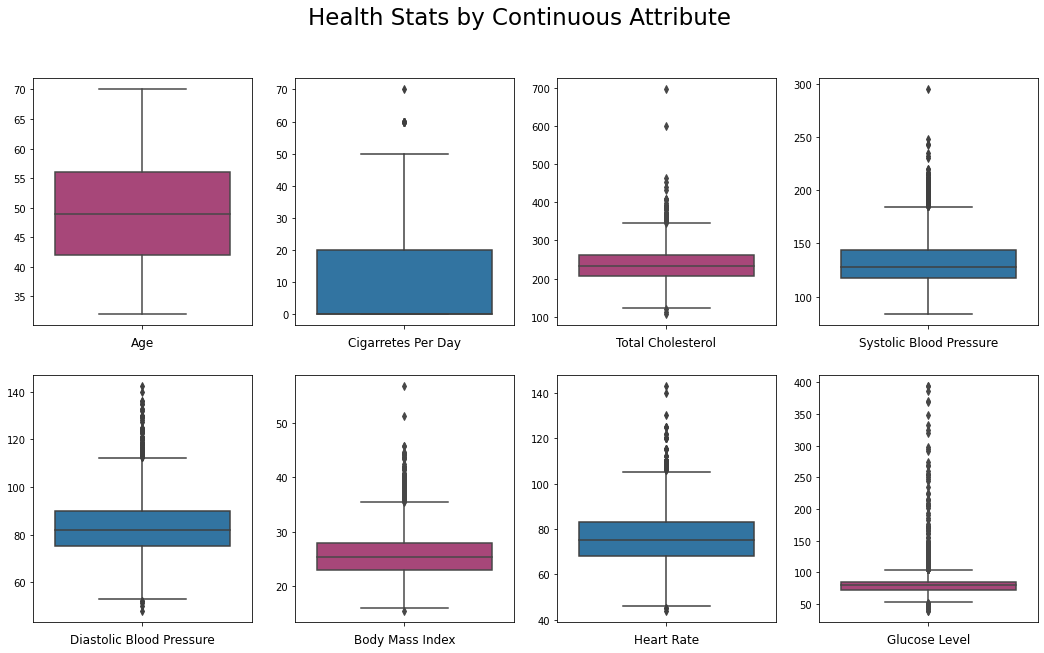

In [5]:
columns=list(data.columns.values)

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Health Stats by Continuous Attribute',fontsize=23)

sns.boxplot(ax=axes[0, 0], data=data ,y='age',palette='magma')
axes[0,0].set_ylabel('')
axes[0,0].set_xlabel('Age',fontsize=12)

sns.boxplot(ax=axes[0, 1], data=data ,y='cigsPerDay')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('Cigarretes Per Day',fontsize=12)

sns.boxplot(ax=axes[0, 2], data=data ,y='totChol',palette='magma')
axes[0,2].set_ylabel('')
axes[0,2].set_xlabel('Total Cholesterol',fontsize=12)

sns.boxplot(ax=axes[0, 3], data=data ,y='sysBP')
axes[0,3].set_ylabel('')
axes[0,3].set_xlabel('Systolic Blood Pressure',fontsize=12)

sns.boxplot(ax=axes[1, 0], data=data ,y='diaBP')
axes[1,0].set_ylabel('')
axes[1,0].set_xlabel('Diastolic Blood Pressure',fontsize=12)

sns.boxplot(ax=axes[1, 1], data=data ,y='BMI',palette='magma')
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('Body Mass Index',fontsize=12)

sns.boxplot(ax=axes[1, 2], data=data ,y='heartRate')
axes[1,2].set_ylabel('')
axes[1,2].set_xlabel('Heart Rate',fontsize=12)

sns.boxplot(ax=axes[1, 3], data=data ,y='glucose',palette='magma')
axes[1,3].set_ylabel('')
axes[1,3].set_xlabel('Glucose Level',fontsize=12)
plt.plot()

These were the continuous variables in this dataset and here are some summaries about them

-Age: the only feature without outliers and most of the data are between 42 and 56.

-Cigarretes per day: only a few outliers above 50 and most of the data are less than 20.

-Total Cholesterol & Body Mas Index: Both features we have a large amount of variability and 2 far outliers.

-Systolic Blood Pressure & Diastolic Blood Pressure & Heart Rate: These features have similiar boxplots with the 
majority of the data oriented to lower values

-Glucose Level: This boxplot has the proponderance of the data to very low values and a lot of variability 


Now we proceed to plot the nominal values where 0: No and 1: yes

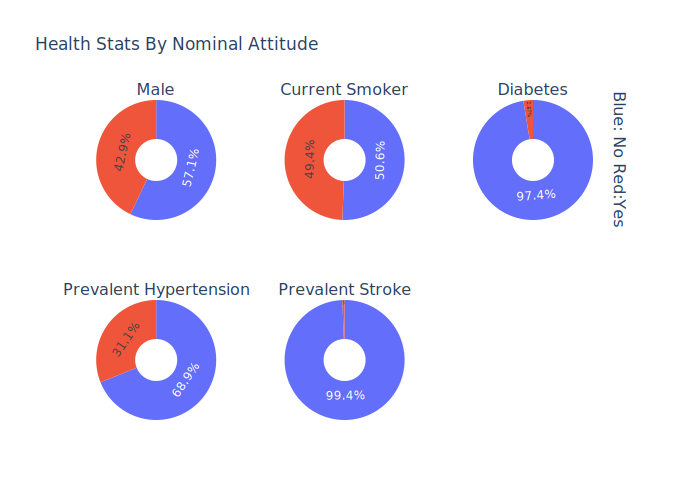

In [6]:
male=data.male.value_counts()
smoker=data.currentSmoker.value_counts()
dia=data.diabetes.value_counts()
prevahyp=data.prevalentHyp.value_counts()
preva=data.prevalentStroke.value_counts()

fig = make_subplots(rows=2, cols=3,specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]],subplot_titles=('Male', 'Current Smoker','Diabetes', 'Prevalent Hypertension','Prevalent Stroke'),row_titles=['                                  Blue: No      Red:Yes'])

fig.add_trace(go.Pie(values=male.values,labels=male.index),row=1, col=1)
fig.add_trace(go.Pie(values=smoker.values,labels=smoker.index),row=1, col=2)
fig.add_trace(go.Pie(values=dia.values,labels=dia.index),row=1, col=3)
fig.add_trace(go.Pie(values=prevahyp.values,labels=prevahyp.index),row=2, col=1)
fig.add_trace(go.Pie(values=preva.values,labels=preva.index),row=2, col=2)

fig.update(layout_title_text='Health Stats By Nominal Attitude',
           layout_showlegend=False)
fig.update_traces(hole=.35,textposition='inside')

fig.show('svg')


As we can see the majority of people in this data are females to be exact 57,1% and we have practically the same proportion of smokers and non-smokers.
Almost 2,6% of poeple has diabetes, wich is low, and as for prevalent diseases we have a significant proportion of people with hypertension but for the prevalence stroke is almost 0

Our target variable is TenYearCHD wich indicates the 10 year risk from suffer a coronary heart disease (1: Yes and 0: No)

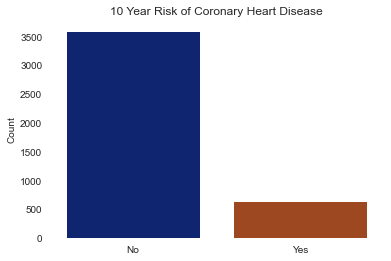

In [7]:
sns.set_style("white")

chd=sns.countplot(data=data,x='TenYearCHD',palette='dark')
plt.title('10 Year Risk of Coronary Heart Disease')
chd.set(ylabel='Count', xlabel=None, xticklabels=['No','Yes'])
sns.despine(left=True, bottom=True)
plt.show()

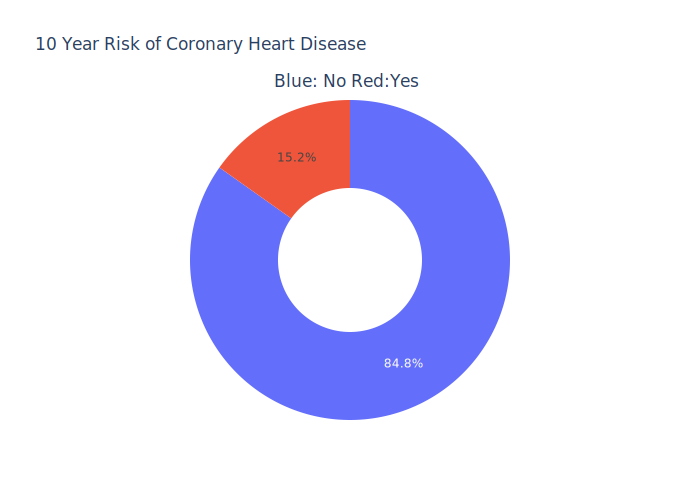

In [8]:
chd1=data.TenYearCHD.value_counts()
chd11=px.pie(values=chd1.values,names=chd1.index,title='10 Year Risk of Coronary Heart Disease',hole=0.45)
chd11.update_layout(annotations=[dict(text='Blue: No  Red:Yes', x=0.494, y=1.1, font_size=17, showarrow=False)],                                    showlegend=False)
chd11.show('svg')

Most of the poeple dont have a 10 year risk from suffer a coronary heart disease (84,8%) 

### 4) Bivariate Analysis

And the last step in this EDA is the bivariate analysis and and we can observe it with a correlation matrix

In [9]:
con_cols=['TenYearCHD','age','cigsPerDay','sysBP','diaBP','BMI','heartRate','glucose']
cormatrix=data[con_cols].corr().transpose()
print(cormatrix)

            TenYearCHD       age  cigsPerDay     sysBP     diaBP       BMI  \
TenYearCHD    1.000000  0.225256    0.057775  0.216429  0.145299  0.074680   
age           0.225256  1.000000   -0.192366  0.394302  0.206104  0.135283   
cigsPerDay    0.057775 -0.192366    1.000000 -0.088505 -0.056391 -0.092453   
sysBP         0.216429  0.394302   -0.088505  1.000000  0.784002  0.325247   
diaBP         0.145299  0.206104   -0.056391  0.784002  1.000000  0.376544   
BMI           0.074680  0.135283   -0.092453  0.325247  0.376544  1.000000   
heartRate     0.022898 -0.012819    0.074851  0.182174  0.181246  0.067544   
glucose       0.120406  0.116850   -0.056088  0.134608  0.058647  0.082109   

            heartRate   glucose  
TenYearCHD   0.022898  0.120406  
age         -0.012819  0.116850  
cigsPerDay   0.074851 -0.056088  
sysBP        0.182174  0.134608  
diaBP        0.181246  0.058647  
BMI          0.067544  0.082109  
heartRate    1.000000  0.089341  
glucose      0.089341  1.

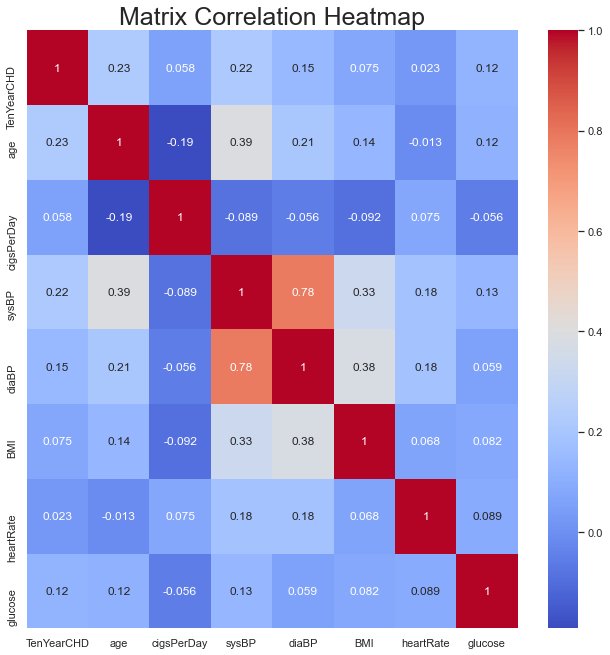

In [10]:
sns.set(rc={'figure.figsize':(11,11)})
sns.heatmap(cormatrix, annot=True,linewidths=0,cmap='coolwarm')
plt.title('Matrix Correlation Heatmap',fontsize=25)
plt.show()

As we can see the only high value is the relationship beetwen diastolic blood pressure and systolic blood pressure. This can be explained by this sentence "Blood pressure readings are given in two numbers. The top number is the maximum pressure your heart exerts while beating (systolic pressure)" as shown below

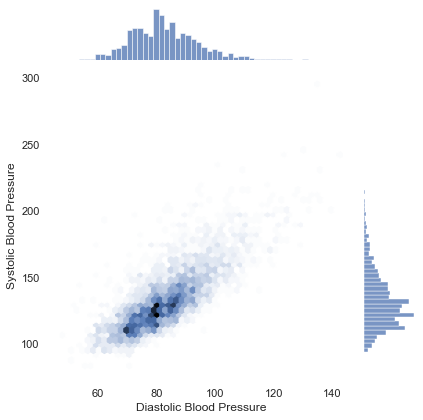

In [11]:
sns.set_style('white')

sns.jointplot(x="diaBP", y="sysBP",kind='hex',data=data)
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
sns.despine(left=True, bottom=True)
plt.show()

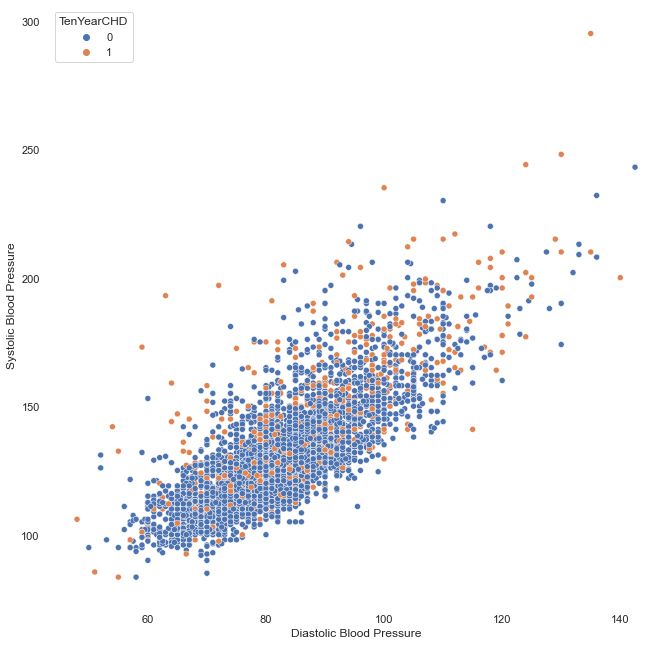

In [12]:
sns.scatterplot(x='diaBP',y='sysBP',data=data,hue='TenYearCHD')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel('Systolic Blood Pressure')
sns.despine(left=True, bottom=True)
plt.show()

As we can see this features dont have direct relation with our target variable

Now we're going to plot the diferents features with our target with a barplot.

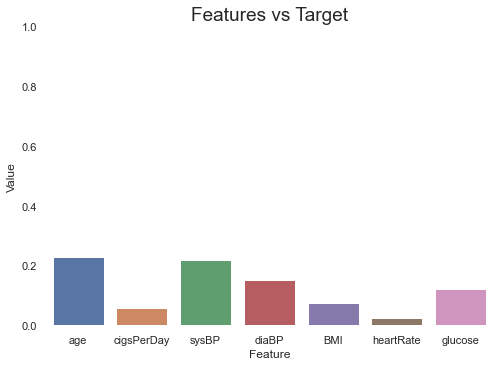

In [13]:
tych= [['age', 0.23], ['cigsPerDay', 0.058], ['sysBP', 0.22],['diaBP',0.15],['BMI',0.075],['heartRate',0.023],['glucose',0.12]]
tychd=pd.DataFrame(tych,columns=['Feature','Value'])

sns.set(rc={'figure.figsize':(8,5.5)})
sns.set_style("white")
plotty=sns.barplot(x='Feature',y='Value',data=tychd)
plt.ylim(0,1)
plt.title('Features vs Target',fontsize=19)
sns.despine(left=True, bottom=True)
plt.show()

Age is the most correlated feature with the target but its value isnt significally enough.

### 5)Logistic Regression and Results
Model evaluation with Train Test Split 

In [14]:
X=data.drop(['TenYearCHD'],axis=1)
y=data['TenYearCHD']


Train Test split results:
LogisticRegression  accuracy is 0.857
LogisticRegression  log_loss is 0.380
LogisticRegression  auc is 0.709
Using a threshold of 0.066 guarantees a sensitivity of 0.952 and a specificity of 0.258


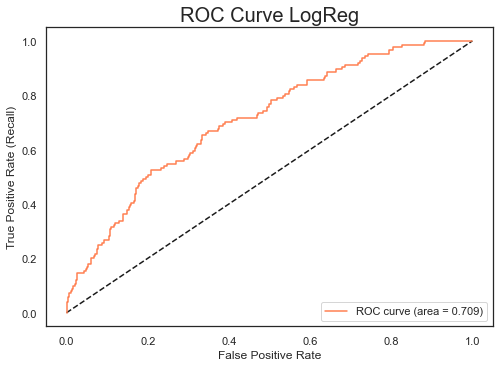

In [15]:
#Pareto principle
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

pipeline=Pipeline(steps=[('scaler', StandardScaler()),('logreg',LogisticRegression())])
logreg_scaled=pipeline.fit(X_train,y_train)

y_pred=logreg_scaled.predict(X_test)
y_pred_proba = logreg_scaled.predict_proba(X_test)[:, 1]
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
print('Train Test split results:')
print('LogisticRegression'," accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print('LogisticRegression'," log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print('LogisticRegression'," auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) )

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve LogReg',fontsize=20)
plt.legend(loc="lower right")
plt.show()


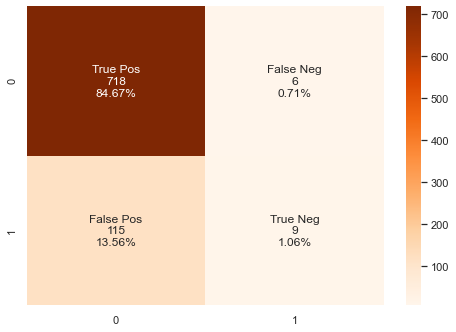

In [16]:
cf_matrix1 = confusion_matrix(y_test, y_pred)

group_names = ['True Pos','False Neg','False Pos','True Neg']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Oranges')
plt.show()

now, model evaluation with K-fold cross validation using cross_val_score() function

In [17]:
logreg = LogisticRegression(max_iter=2000)
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
#10 folds
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print('LogisticRegression'+" average accuracy is %2.3f" % scores_accuracy.mean())
print('LogisticRegression'+" average log_loss is %2.3f" % -scores_log_loss.mean())
print('LogisticRegression'+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.856
LogisticRegression average log_loss is 0.382
LogisticRegression average auc is 0.726


GridSearchCV evaluating using multiple scorers, RepeatedStratifiedKFold and pipeline for preprocessing simultaneously

In [18]:
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

steps=[('scale',StandardScaler(with_mean=False,with_std=False)),('clf',LogisticRegression(max_iter=3000))]
log_pipe = Pipeline(steps=steps)

log_clf = GridSearchCV(estimator=log_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)
results = log_clf.cv_results_


print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)


best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf',
                 LogisticRegression(C=1.1000100000000002, max_iter=3000))])
best params: {'clf__C': 1.1000100000000002}
best score: 0.8530973451327435


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



### Now we're going to predict with KNNeighbors 
first we need to know wich is the best k for our model

Max test score 85.96698113207547% and k = [10]
As you can see in the next plot


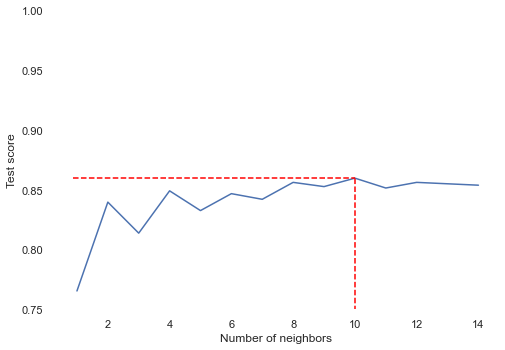

In [20]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

test_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    test_scores.append(knn.score(X_test,y_test))

max_test_score = max(test_scores) #busca el score maximo
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score] #busca el mejor k
print('Max test score {}% and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
print('As you can see in the next plot')

sns.lineplot(x=range(1,15),y=test_scores)
plt.plot([10,10],[0,max_test_score],'--',color='red')
plt.plot([max_test_score,10],[max_test_score,max_test_score],'--',color='red')
plt.ylim([0.75,1])
plt.xlabel('Number of neighbors')
plt.ylabel('Test score')
sns.despine(left=True,bottom=True)
plt.show()

Train Test split results:
KNeighborsClassifier  accuracy is 0.844
KNeighborsClassifier  log_loss is 1.338
KNeighborsClassifier  auc is 0.634


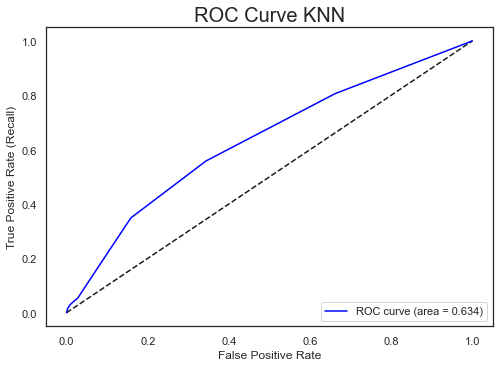

In [21]:
steps1=[('scaler',StandardScaler()),('knn',KNeighborsClassifier(n_neighbors=10))]
knn_scaled=Pipeline(steps1)
knn_scaled.fit(X_train1,y_train1)

y_pred1=knn_scaled.predict(X_test1)
y_pred_proba1 = knn_scaled.predict_proba(X_test1)[:, 1]
fpr1, tpr1, thr1 = roc_curve(y_test1, y_pred_proba1)
print('Train Test split results:')
print('KNeighborsClassifier'," accuracy is %2.3f" % accuracy_score(y_test1, y_pred1))
print('KNeighborsClassifier'," log_loss is %2.3f" % log_loss(y_test1, y_pred_proba1))
print('KNeighborsClassifier'," auc is %2.3f" % auc(fpr1, tpr1))

idx1 = np.min(np.where(tpr1 > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1, tpr1, color='blue', label='ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve KNN',fontsize=20)
plt.legend(loc="lower right")
plt.show()


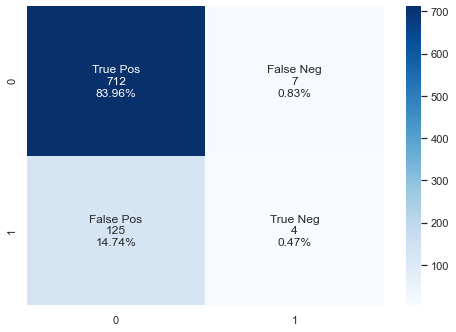

In [22]:
cf_matrix_knn = confusion_matrix(y_test1, y_pred1)

group_counts1 = ['{0:0.0f}'.format(value) for value in
                cf_matrix_knn.flatten()]
group_percentages1 = ['{0:.2%}'.format(value) for value in
                     cf_matrix_knn.flatten()/np.sum(cf_matrix_knn)]
labels1 = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts1,group_percentages1)]
labels1 = np.asarray(labels1).reshape(2,2)
sns.heatmap(cf_matrix_knn, annot=labels1, fmt='', cmap='Blues')
plt.show()

In [23]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.36      0.03      0.06       129

    accuracy                           0.84       848
   macro avg       0.61      0.51      0.49       848
weighted avg       0.78      0.84      0.78       848



And the last step for this algorithm is the GridSearch because we want to found the best hyper parameters

In [24]:
param_grid = {'knn__n_neighbors':np.arange(1,50)}

knn_cv= GridSearchCV(knn_scaled,param_grid,cv=5)
knn_cv.fit(X,y)

print("best params: " + str(knn_cv.best_estimator_))
print("best params: " + str(knn_cv.best_params_))
print('best score:', knn_cv.best_score_)

best params: Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=29))])
best params: {'knn__n_neighbors': 29}
best score: 0.8492217259584326


## Algorithm Comparison Kneighbors vs LogisticRegrssion

### First we compare all the metrics and then the ROC curves

     Metrics  LogReg   KNN
0   Accuracy    0.86  0.85
1   Log Loss    0.38  1.34
2  AUC Score    0.72  0.63
3  Precision    0.82  0.78
4     Recall    0.86  0.84
5   F1 Score    0.81  0.78


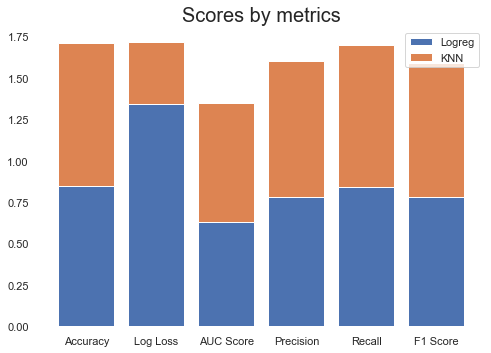

In [36]:
metrics=['Accuracy','Log Loss','AUC Score','Precision','Recall','F1 Score']
LogRegval=[0.86,0.38,0.72,0.82,0.86,0.81]
knnval=[0.85,1.34,0.63,0.78,0.84,0.78]
resultss = {'Metrics':metrics,'LogReg':LogRegval, 'KNN': knnval}
resultsss= pd.DataFrame(resultss)
print(resultsss)

fig, ax = plt.subplots()
ax.bar(metrics, knnval, label='Logreg')
ax.bar(metrics, LogRegval,  bottom=knnval, label='KNN')
ax.set_ylabel('')
ax.set_title('Scores by metrics',fontsize=20)
ax.legend()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()


Analysis

for the accuracy we have that the models have almost the same values with a slight difference of 0.01 or 1% with Logistic Regression having the highest value (0.86)

for logloss we have the knowledge that the models with lower log-loss score is better than the ones with higher log-loss score by this logic we have a that the Logistic Regression (0.38) is much better than the KNeighbors(1.34).

for the AUC Score it is easier to visualize one ROC curve over the other but in advance the Logistic Regression is better 

Precision is the metric where we measure the quality of a model, therefore, the higher the better. In this analysis we can say that the Logistic Regresion has a small lead of 0.04 over the Kneighbors

Recall is the metric where we have the ratio of correctly predicted positive observations to the all observations. we can say that the model is good when it has a value higher than 0.5 wich they both do. Again Logistic Regression has better performance.

And the last metric is the F1 Score and as we have a binary classification the higher the better. Logistic Regression has a higher value therefore has a better performance.

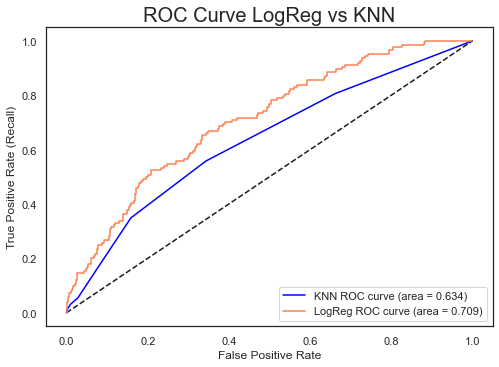

In [28]:
#one ROC curve over another
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr1, tpr1, color='blue', label='KNN ROC curve (area = %0.3f)' % auc(fpr1, tpr1))
plt.plot(fpr, tpr, color='coral', label='LogReg ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve LogReg vs KNN',fontsize=20)
plt.legend(loc="lower right")
plt.show()

As we can see the AUC for the Logistic Regression is bigger than the KNeigbors so the first model is better

### Conclusions

The model with logistic regression has an advantage in all categories and is therefore the model with the best performance to predict if a person may suffer a coronary heart disease in ten years.